In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I Sentiment Analysis - ML Based approach or Document Classification

In [49]:
# Movie reviews
imdb = pd.read_csv('data/IMDB Dataset.csv')
print(imdb.shape)
imdb.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
from wordcloud import WordCloud

In [11]:
import nltk

In [17]:
common_stopwords = nltk.corpus.stopwords.words('english')
custom_stopwords = ['<br />', '<br/>', 'br', 'film', 'movie']
stopwords = common_stopwords + custom_stopwords

In [18]:
docs = imdb['review'].str.lower()

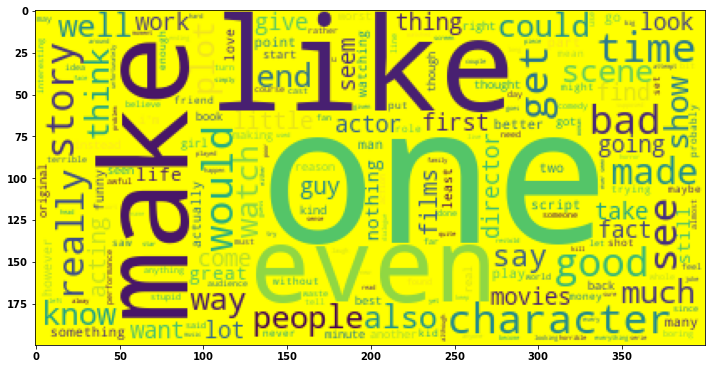

In [19]:
# Negetive Reviews
docs_string_negative = ' '.join(imdb[imdb['sentiment']=='negative']['review'].str.lower())
wc = WordCloud(background_color='yellow', stopwords=stopwords).generate(docs_string_negative)
plt.figure(figsize=(12,9))
plt.imshow(wc)

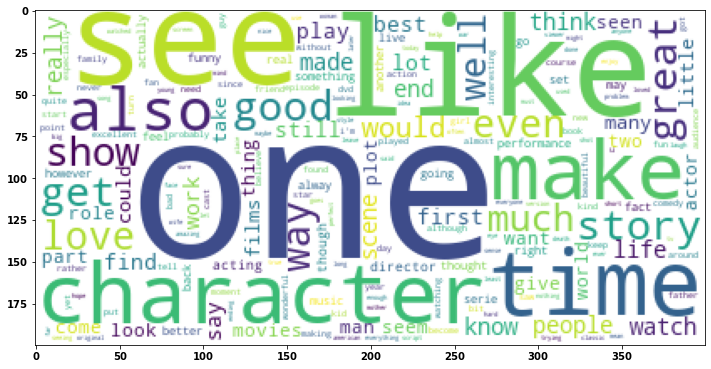

In [20]:
# Possitive Reviews
docs_string_positive = ' '.join(imdb[imdb['sentiment']=='positive']['review'].str.lower())
wc = WordCloud(background_color='white', stopwords=stopwords).generate(docs_string_positive)
plt.figure(figsize=(12,9))
plt.imshow(wc)

### Text Pre-processing

In [22]:
imdb.isna().sum()

review       0
sentiment    0
dtype: int64

In [23]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.porter import PorterStemmer

In [25]:
stemmer = PorterStemmer()

docs = imdb['review'].str.lower().str.replace('<br/>', '').str.replace('<br />', '').str.replace('[^a-z\s]','')
docs = docs.apply(remove_stopwords)
docs = stemmer.stem_documents(docs)
docs = pd.Series(docs)
docs

<ipython-input-25-9d279d0f4d7e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  docs = imdb['review'].str.lower().str.replace('<br/>', '').str.replace('<br />', '').str.replace('[^a-z\s]','')


0        review mention watch oz episod youll hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder wai spend time hot summer weeke...
3        basic there famili littl boi jake think there ...
4        petter mattei love time monei visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment maltin second ra...
49999    expect star trek movi high art fan expect movi...
Length: 50000, dtype: object

### 1. Creating the DTM using the CountVectorizer

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [28]:
X_train, X_text, y_train, y_test = train_test_split(docs, imdb['sentiment'],
                                                   test_size=0.2, random_state=1)

vectorizer = CountVectorizer(min_df=10).fit(X_train)

In [29]:
vocab = vectorizer.get_feature_names()
len(vocab)

16797

In [30]:
train_dtm = vectorizer.transform(X_train)
test_dtm = vectorizer.transform(X_text)

In text analytics most of the time we use
	- Naïve bayes (MultinomialNB)
    - SVM (Support vector machine) algorithms 

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
from sklearn.metrics import accuracy_score

In [32]:
model = MultinomialNB().fit(train_dtm, y_train)

In [34]:
y_test_pred = model.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

Accuracy:  0.8479


### 2. Creating the DTM using the TfidFVectorizer

In [38]:
vectorizer = TfidfVectorizer().fit(X_train)
vocab = vectorizer.get_feature_names()
train_dtm = vectorizer.transform(X_train)
test_dtm = vectorizer.transform(X_text)

In [39]:
model = MultinomialNB().fit(train_dtm, y_train)
y_test_pred = model.predict(test_dtm)
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

Accuracy:  0.8626


# II Sentiment Analysis Rule based

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
# Example of VADER

review = "I like tea"
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(review)

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [43]:
# Intensity of words
review = "I LIKE tea"
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(review)

{'neg': 0.0, 'neu': 0.236, 'pos': 0.764, 'compound': 0.4995}

In [44]:
# Booster words or emoticons
review = "I LIKE tea!!!"
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(review)

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.626}

In [45]:
# Booster words or emoticons
review = "I very much LIKE tea!!!"
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(review)

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6583}

In [42]:
# Example of negative sentense
review = "I hate coffee I love tea"
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(review)

{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}

In [46]:
# Example of negative sentense with emoticons
review = "I hate coffee I love tea :("
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(review)

{'neg': 0.516, 'neu': 0.156, 'pos': 0.328, 'compound': -0.34}

### Sentiment analysis for IMDB data

In [50]:
imdb['docs'] = imdb['review'].str.replace('<br />', '').str.replace('[\.]', '')
imdb['docs'].head()

<ipython-input-50-316a9de0a8ba>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb['docs'] = imdb['review'].str.replace('<br />', '').str.replace('[\.]', '')


0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: docs, dtype: object

In [51]:
imdb['sentiment_compound_score'] = imdb['docs'].apply(
    lambda v: analyzer.polarity_scores(v)['compound']
)
imdb.head()

,review,sentiment,docs,sentiment_compound_score
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,-0.9951
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.9641
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.9605
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",0.9744


In [53]:
def get_sentiment_tag(compound_score):
    if compound_score > 0:
        return 'positive'
    else:
        return 'negative'

In [52]:
def get_sentiment_tag_v2(compound_score):
    if compound_score > 0.3:
        return 'positive'
    elif compound_score < -0.3:
        return 'negative'
    else:
        return 'neutral'

In [54]:
imdb['sentiment_vader'] = imdb['sentiment_compound_score'].apply(get_sentiment_tag)
imdb.head()

,review,sentiment,docs,sentiment_compound_score,sentiment_vader
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,-0.9951,negative
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tech...,0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,0.9605,positive
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...,-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",0.9744,positive


<AxesSubplot:ylabel='Frequency'>

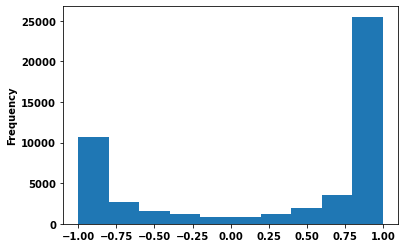

In [55]:
imdb['sentiment_compound_score'].plot.hist()

In [58]:
imdb['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64